## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bribe_report.csv')
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [3]:
df.isnull().sum()

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3429 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB


In [5]:
df.describe()

,Views,Amount(INR)
count,3473.000000,3.473000e+03
mean,3379.405701,3.331083e+04
std,1540.854884,1.508203e+05
min,463.000000,1.000000e+00
25%,2081.000000,3.300000e+02
50%,3272.000000,1.200000e+03
75%,4522.000000,8.000000e+03
max,20450.000000,2.185000e+06


In [6]:
df.Department.value_counts()

Others                                    472
Police Verification for Passport          266
Traffic Violations                        236
Birth Certificate                         155
Traffic Fines, Penalties, Rules           101
                                         ... 
Inspection of Vehicles after Accidents      1
License Renewal                             1
Title Deed                                  1
Extra Charges                               1
Enrolment for Aadhaar Card                  1
Name: Department, Length: 367, dtype: int64

In [7]:
df.Department.fillna(value='Others',inplace=True)

In [8]:
df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [9]:
df.rename(columns={'Amount(INR)':'Amount'},inplace=True)

## Bar chart for top 10 bribe taking cities

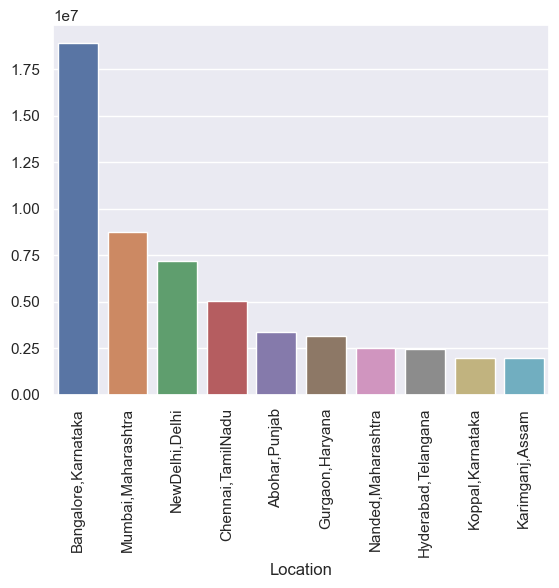

In [10]:
# Perform groupby and calculate mean values, sort in descending order, and take the top 10 records
top_10_locations = df.groupby('Location').Amount.sum().sort_values(ascending=False).head(10)

# Create the bar plot using the top 10 locations
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.xticks(rotation=90)
plt.show()

In [11]:
# Getting state in new column
df['state'] = df['Location'].str.split(',').str[1].str.strip()

## State Wise Bribe

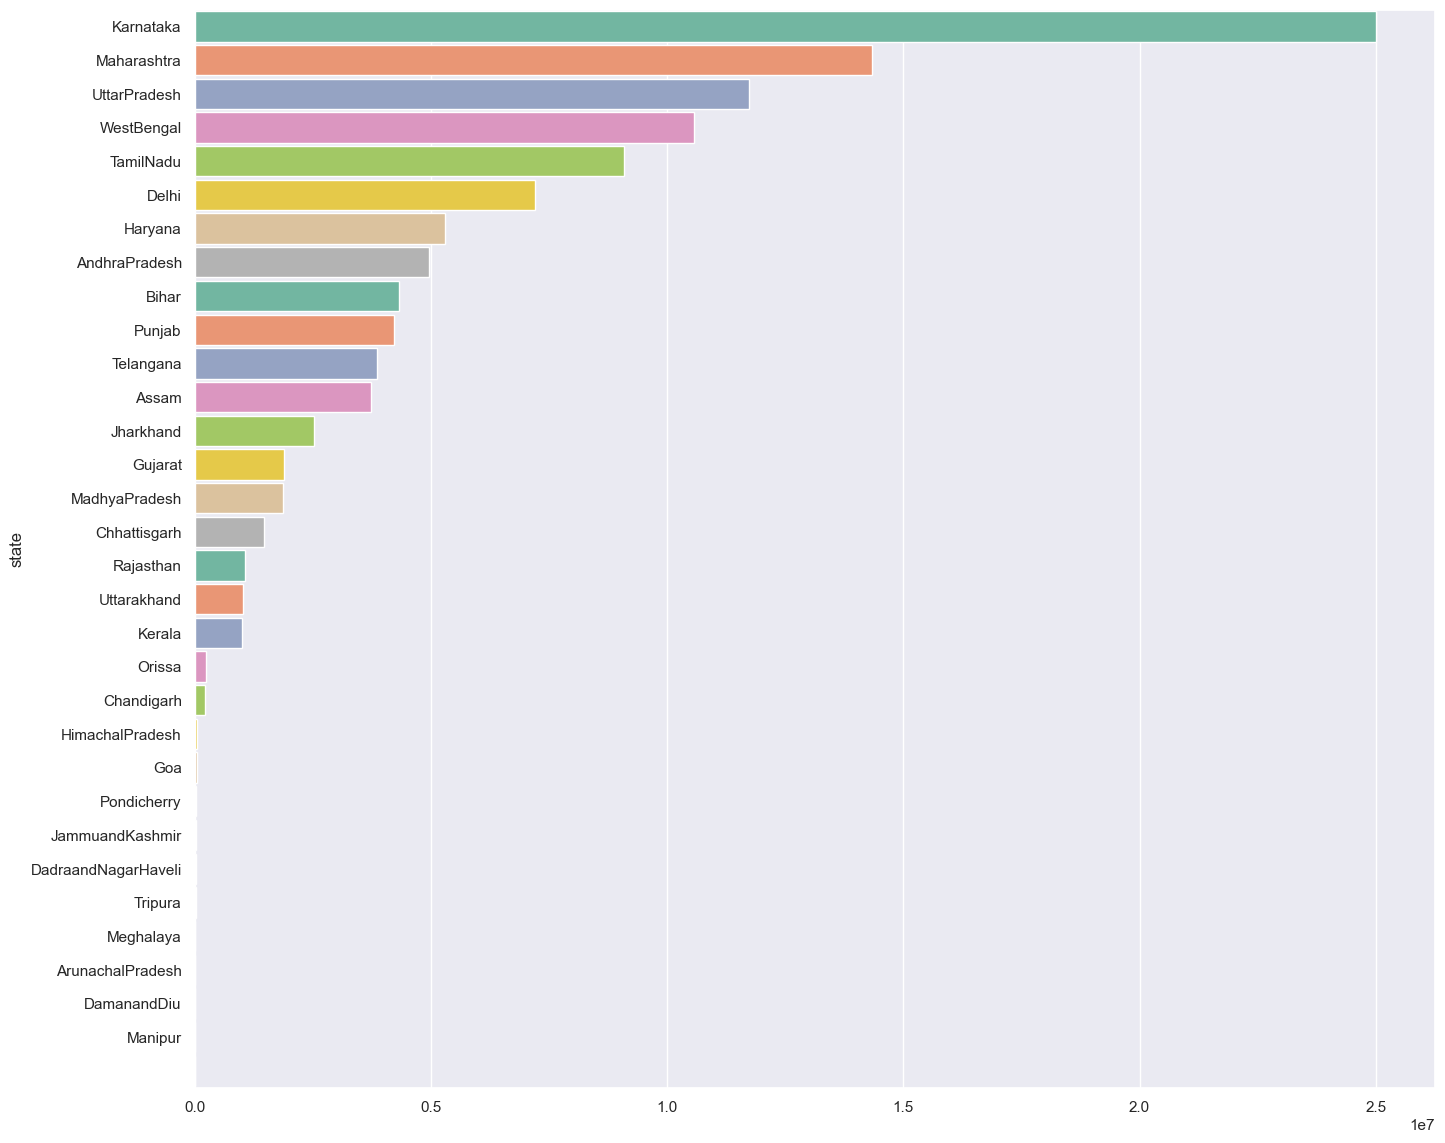

In [12]:
plt.figure(figsize=(16,14))
# Perform groupby and calculate mean values, sort in descending order, and take the top 10 records
state = df.groupby('state').Amount.sum().sort_values(ascending=False)

# Create the bar plot using the top 10 states
sns.barplot(y=state.index, x=state.values,palette='Set2',width=.9)
plt.show()

In [13]:
df.head()

,Title,Date,Location,Department,Views,Amount,state
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,Karnataka
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Karnataka
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Karnataka
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Karnataka
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,Bihar


# Top 10 Total Bribe taking Department 

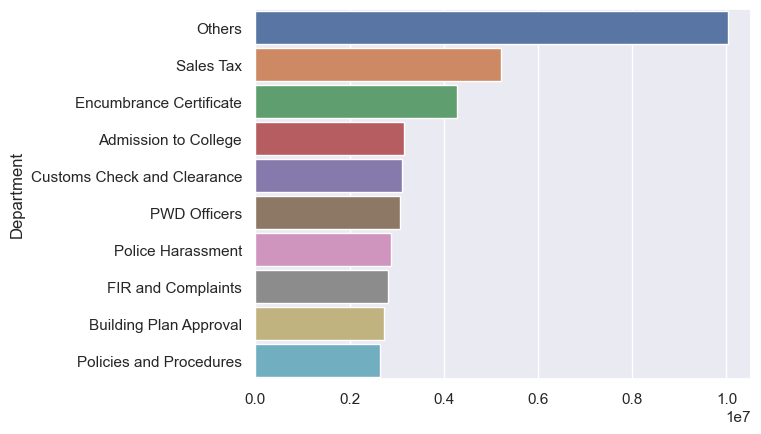

In [14]:
# Perform groupby and calculate Total values, sort in descending order, and take the top 10 records
top_10_department = df.groupby('Department').Amount.sum().sort_values(ascending=False).head(10)

# Create the bar plot using the top 10 departements
sns.barplot(y=top_10_department.index, x=top_10_department.values,width=.9)
plt.show()

## Top 10 Average Bribe taking Department

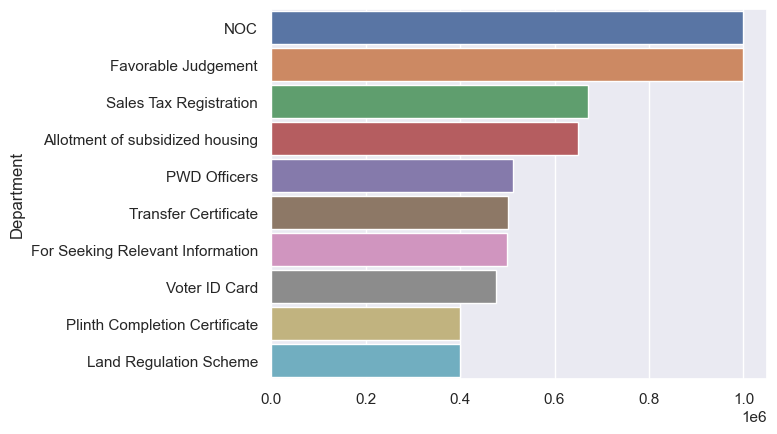

In [15]:
# Perform groupby and calculate mean values, sort in descending order, and take the top 10 records
top_10_department = df.groupby('Department').Amount.mean().sort_values(ascending=False).head(10)

# Create the bar plot using the top 10 departements
sns.barplot(y=top_10_department.index, x=top_10_department.values,width=.9)
plt.show()

In [16]:
df.head()

,Title,Date,Location,Department,Views,Amount,state
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,Karnataka
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Karnataka
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Karnataka
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Karnataka
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,Bihar


In [17]:
df.sort_values('Amount',ascending=False).head(10)

,Title,Date,Location,Department,Views,Amount,state
851,ADJUDICATION FEES,18-05-19,"Mumbai,Maharashtra",Encumbrance Certificate,4058,2185000,Maharashtra
2417,Breaking CCI norms to favour a company,28-10-16,"Koppal,Karnataka",PWD Officers,5615,2000000,Karnataka
143,Ten crores of corruption in gst vadodara two,20-05-20,"Abohar,Punjab",Assessment,2438,2000000,Punjab
1601,Rubber Sheet,12/3/2018,"Karimganj,Assam",Sales Tax Registration,5166,2000000,Assam
188,Khata Bifurcation Charges,12/3/2020,"Bangalore,Karnataka",Encumbrance Certificate,3845,2000000,Karnataka
1295,Bribe paid to municipal corporation,8/10/2018,"Azamgarh,UttarPradesh",Building Plan Approval,4590,1900000,UttarPradesh
2488,Paid a bribe of INR 16 lakhs for getting admis...,24-09-16,"Durgapur,WestBengal",Admission to College,4455,1600000,WestBengal
273,Corruption DC Office Bangalore,3/1/2020,"Bangalore,Karnataka",Court Related,2002,1500000,Karnataka
2547,I Paid Rs. 1500000 to Municipal Services in As...,30-08-16,"Asansol,WestBengal",Voter ID Card,3934,1500000,WestBengal
203,Illegal source of income,24-02-20,"Patna,Bihar",Others,2617,1300000,Bihar


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       3473 non-null   object
 1   Date        3473 non-null   object
 2   Location    3473 non-null   object
 3   Department  3473 non-null   object
 4   Views       3473 non-null   int64 
 5   Amount      3473 non-null   int64 
 6   state       3473 non-null   object
dtypes: int64(2), object(5)
memory usage: 190.1+ KB


In [19]:
# changing data type of date column
df['Date']= pd.to_datetime(df.Date)

In [20]:
# Getting weekday from the date column
df['weekday'] = df.Date.dt.day_name()

In [21]:
# Getting month from the date column
df['month'] = df.Date.dt.month_name()

In [22]:
# Getting year from the date column
df['year'] = df.Date.dt.year

In [23]:
df.head(5)

,Title,Date,Location,Department,Views,Amount,state,weekday,month,year
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,Karnataka,Wednesday,October,2020
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Karnataka,Tuesday,October,2020
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Karnataka,Tuesday,October,2020
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Karnataka,Tuesday,October,2020
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,Bihar,Tuesday,October,2020


## Month Wise Total Bribe

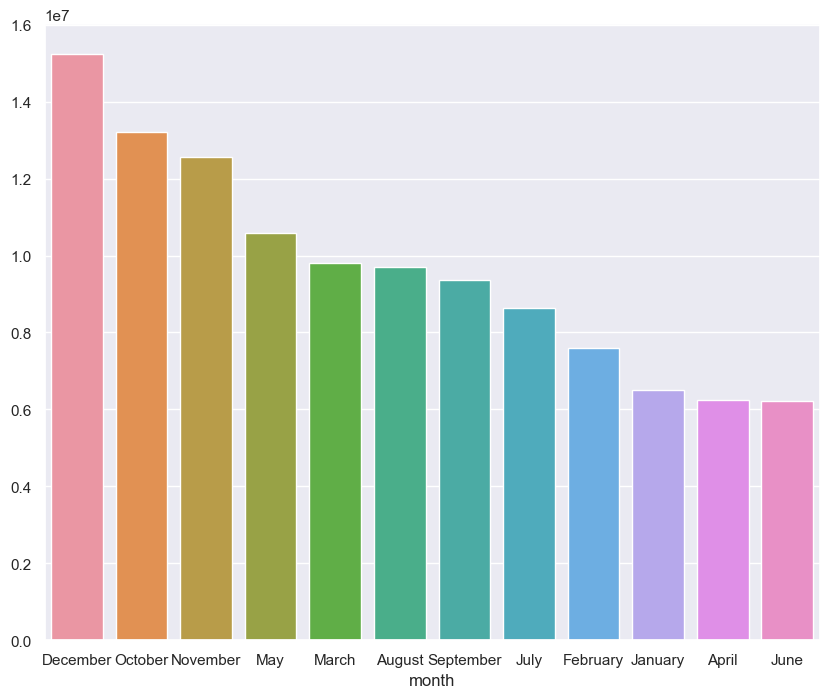

In [24]:
plt.figure(figsize=(10,8))
# Perform groupby and calculate mean values, sort in descending order
Month_wise_bribe = df.groupby('month').Amount.sum().sort_values(ascending=False)

# Create the bar plot using the top 10 departements
sns.barplot(x=Month_wise_bribe.index, y= Month_wise_bribe.values)
plt.show()

# Tree map for Day wise Bribe 

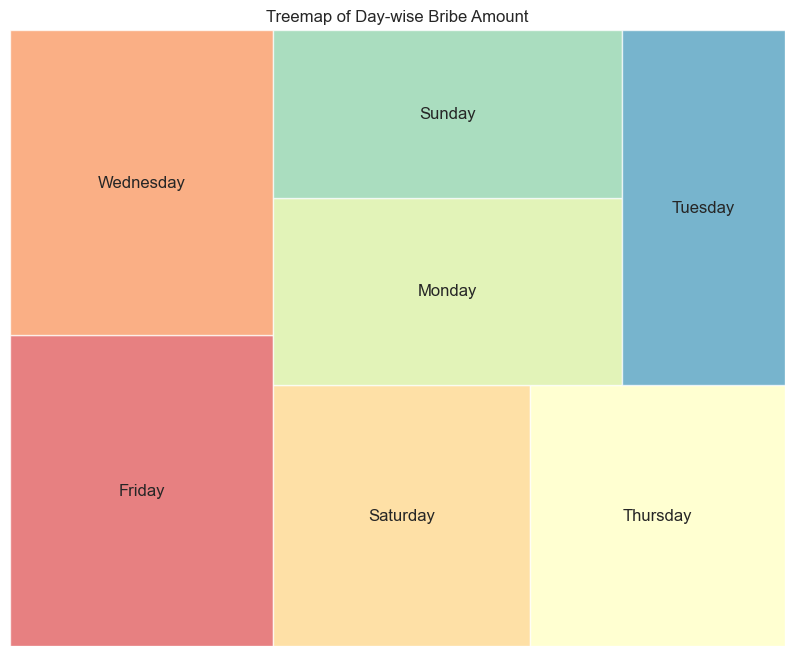

In [27]:
import squarify
# Perform groupby and calculate sum values, sort in descending order
Day_wise_bribe = df.groupby('weekday').Amount.sum().sort_values(ascending=False)

# Convert the data to a list of values
data = Day_wise_bribe.values.tolist()

# Set up the plot
plt.figure(figsize=(10,8))
colors = sns.color_palette("Spectral", len(data))

# Plot the treemap
squarify.plot(sizes=data, label=Day_wise_bribe.index, color=colors, alpha=0.7)

# Customize the plot
plt.axis("off")
plt.title("Treemap of Day-wise Bribe Amount")
plt.show()

In [28]:
df.head()

,Title,Date,Location,Department,Views,Amount,state,weekday,month,year
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,Karnataka,Wednesday,October,2020
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Karnataka,Tuesday,October,2020
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Karnataka,Tuesday,October,2020
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Karnataka,Tuesday,October,2020
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,Bihar,Tuesday,October,2020


In [29]:
df['year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015], dtype=int64)

# Dual Axis chart for Total and Average bribe per Year

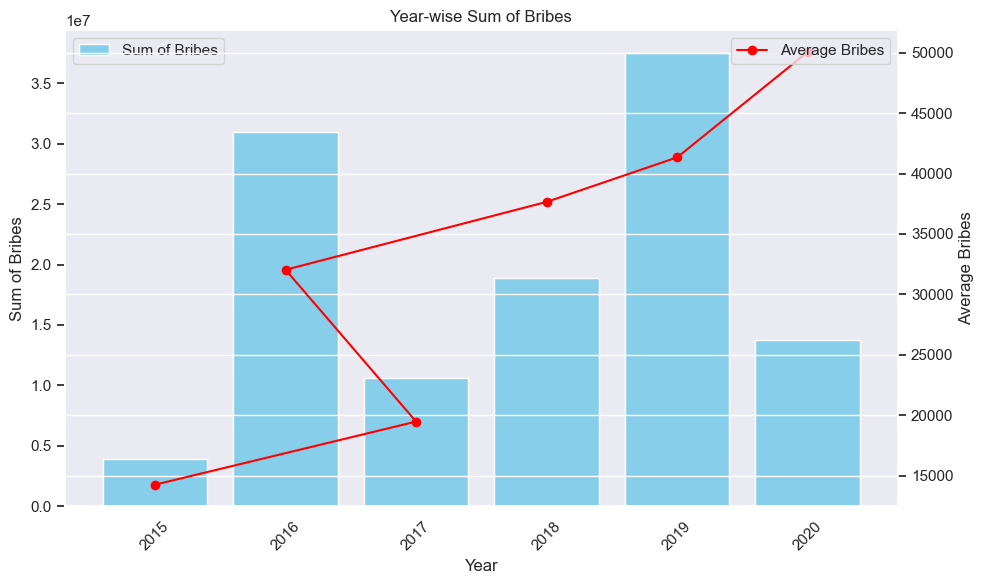

In [30]:
# Perform groupby and calculate sum and mean values, sort by year
Year_wise_bribe_sum = df.groupby('year').Amount.sum().sort_values(ascending=False)
Year_wise_bribe_mean = df.groupby('year').Amount.mean().sort_values(ascending=False)

# Create a figure and axes for the plots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for sum of bribes per year with skyblue color
ax1.bar(Year_wise_bribe_sum.index, Year_wise_bribe_sum.values, color='skyblue')

# Remove grid lines
ax1.grid(False)
ax1.spines['top'].set_visible(False)  # Hide top spine
ax1.spines['right'].set_visible(False)  # Hide right spine

ax1.set_xlabel('Year')
ax1.set_ylabel('Sum of Bribes')
ax1.set_title('Year-wise Sum of Bribes')

# Create a twin axes for the line chart
ax2 = ax1.twinx()

# Plot the line chart for average bribe per year
ax2.plot(Year_wise_bribe_mean.index, Year_wise_bribe_mean.values, color='red', marker='o')
ax2.set_ylabel('Average Bribes')

# Customize the tick labels and legends
ax1.set_xticks(Year_wise_bribe_sum.index)
ax1.set_xticklabels(Year_wise_bribe_sum.index, rotation=45)
ax1.legend(['Sum of Bribes'], loc='upper left')
ax2.legend(['Average Bribes'], loc='upper right')

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()